#Reto Entrega 1 

##Limpieza, Análisis, Visualización y Kmeans 

##Base de Datos de Aguas Subterráneas

-----------------------------------------------------------------------------------------

EQUIPO 68

Denisse Maria Ramirez Colmenero - A01561497

Emmanuel González Calitl - A01320739

-----------------------------------------------------------------------------------------

Materia: Ciencia y Analitica de Datos

Profesor titular: Dra. María de la Paz Rico Fernández 

Profesor tutor: Orlando Figón Cruz

Fecha: 16 de Noviembre de 2022

##Instalación e Importación de librerías

In [4]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 727 kB/s 
     |████████████████████████████████| 1.0 MB 52.0 MB/s 
     |████████████████████████████████| 1.7 MB 30.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 50.9 MB/s 
     |████████████████████████████████| 6.3 MB 29.6 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=8dc17ea488736fcfc2b74f561a4fc68c4f7b29187a509e02f3a8932814dba453
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=40439f63f788fea165d76e82f53f96dbccdeed48be9f0c13b60a734679d36c7d
  Stored in directory: /root/.

In [5]:
#Importación de librerías, módulos y paquetes 
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import pandas as pd
import requests, zipfile
from io import BytesIO
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import  cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from google.colab import drive
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import PowerTransformer

from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import FunctionTransformer

from sklearn.metrics import classification_report, make_scorer
from sklearn.compose import TransformedTargetRegressor
from sklearn.inspection import permutation_importance

from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.impute import KNNImputer
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix

from sklearn import svm

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import learning_curve, validation_curve

from sklearn import metrics
from sklearn.metrics import roc_curve
from numpy import argmax
from numpy import arange
from sklearn.metrics import roc_auc_score

import geopandas as gpd
from shapely.geometry import Point
from sklearn.cluster import KMeans
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

##PARTE 1 - Limpieza de la Base de Datos 

In [6]:
u = 'http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip'
req = requests.get(u)
zipfile.ZipFile(BytesIO(req.content)).extractall('unzipped_zip/')
df=pd.read_csv('unzipped_zip/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv', encoding = 'latin1')
print(df.shape)#1068 muestras, 57 columnas 
df.head()

(1068, 57)


,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [7]:
df_as= df.copy()
df_as.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L
count,1068.000000,1068.000000,1068.0,1064.000000,1062.000000,0.0
mean,-101.891007,23.163618,2020.0,235.633759,1138.953013,NaN
std,6.703263,3.887670,0.0,116.874291,1245.563674,NaN
min,-116.664250,14.561150,2020.0,26.640000,50.400000,NaN
25%,-105.388865,20.212055,2020.0,164.000000,501.750000,NaN
50%,-102.174180,22.617190,2020.0,215.527500,815.000000,NaN
75%,-98.974716,25.510285,2020.0,292.710000,1322.750000,NaN
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,NaN


In [8]:
df_as.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L',
       'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L',
       'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L',
       'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR',
       'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L',
       'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='

Si analizamos nuestro conjunto de datos podemos observar que para cada una de las columnas numéricas tenemos un variable categórica (las que tienen la palabra "CALIDAD") y otra variable binaria (las que tienen la palabra "CUMPLE"). Cada trío de columnas miden y clasifican el mismo atributo pero de diferente manera. Las numéricas miden su cantidad en unidades (por ejemplo miligramos por litro), la categórica clasifica esa cantidad como dato ordinal (Baja, Media, Alta, etc.) y la binaria los clasifica en si cumple o no con la calidad requerida. 
Para fines de este análisis hemos decidido optar por usar solamente las variables numéricas ya que podemos obtener más información real de ellas y podemos hacer una análisis más profundo obteniendo sus medidas. Está decisión es con el objetivo de hacer nuestro conjunto de datos más simple y sin redundancia y por ende, poder realizar el análisis más rapido. 

Igualmente seguiremos usando las variables que nos indican la localización del sitio de muestreo, como la longitud y latitud.

In [9]:
df_as.isnull().sum()#vemos que hay varias columnas con datos nulos, incluso la columna SDT_mg/L se compone de puros datos NaN

CLAVE                      0
SITIO                      0
ORGANISMO_DE_CUENCA        0
ESTADO                     0
MUNICIPIO                  0
ACUIFERO                   0
SUBTIPO                    0
LONGITUD                   0
LATITUD                    0
PERIODO                    0
ALC_mg/L                   4
CALIDAD_ALC                4
CONDUCT_mS/cm              6
CALIDAD_CONDUC             6
SDT_mg/L                1068
SDT_M_mg/L                 2
CALIDAD_SDT_ra             2
CALIDAD_SDT_salin          2
FLUORUROS_mg/L             0
CALIDAD_FLUO               0
DUR_mg/L                   1
CALIDAD_DUR                1
COLI_FEC_NMP/100_mL        0
CALIDAD_COLI_FEC           0
N_NO3_mg/L                 1
CALIDAD_N_NO3              1
AS_TOT_mg/L                0
CALIDAD_AS                 0
CD_TOT_mg/L                0
CALIDAD_CD                 0
CR_TOT_mg/L                0
CALIDAD_CR                 0
HG_TOT_mg/L                0
CALIDAD_HG                 0
PB_TOT_mg/L   

In [10]:
numericas = ['ALC_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L', 'COLI_FEC_NMP/100_mL', 'CONDUCT_mS/cm', 'CR_TOT_mg/L', 'DUR_mg/L',
             'FE_TOT_mg/L', 'FLUORUROS_mg/L', 'HG_TOT_mg/L', 'MN_TOT_mg/L', 'N_NO3_mg/L', 'PB_TOT_mg/L', 'SDT_M_mg/L', 'SDT_mg/L']
#Tenemos 15 variables numéricas

df_num = df_as[['ALC_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L', 'COLI_FEC_NMP/100_mL', 'CONDUCT_mS/cm', 'CR_TOT_mg/L', 'DUR_mg/L',
             'FE_TOT_mg/L', 'FLUORUROS_mg/L', 'HG_TOT_mg/L', 'MN_TOT_mg/L', 'N_NO3_mg/L', 'PB_TOT_mg/L', 'SDT_M_mg/L', 'SDT_mg/L']]
df_num

,ALC_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,COLI_FEC_NMP/100_mL,CONDUCT_mS/cm,CR_TOT_mg/L,DUR_mg/L,FE_TOT_mg/L,FLUORUROS_mg/L,HG_TOT_mg/L,MN_TOT_mg/L,N_NO3_mg/L,PB_TOT_mg/L,SDT_M_mg/L,SDT_mg/L
0,229.990,0.0161,<0.003,<1.1,940.0,<0.005,213.732,0.0891,0.9766,<0.0005,<0.0015,4.184656,<0.005,603.6,NaN
1,231.990,0.0134,<0.003,<1.1,608.0,<0.005,185.0514,<0.025,0.9298,<0.0005,<0.0015,5.75011,<0.005,445.4,NaN
2,204.920,0.037,<0.003,<1.1,532.0,<0.005,120.719,<0.025,1.8045,<0.0005,<0.0015,1.449803,<0.005,342,NaN
3,327.000,0.0154,<0.003,<1.1,686.0,0.005,199.879,<0.025,1.1229,<0.0005,<0.0015,1.258597,<0.005,478.6,NaN
4,309.885,<0.01,<0.003,291,1841.0,<0.005,476.9872,<0.025,0.2343,<0.0005,<0.0015,15.672251,<0.005,1179,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,231.045,<0.01,<0.003,<1.1,2350.0,<0.005,752.096,<0.025,<0.2,<0.0005,<0.0015,14.615488,<0.005,1545.8,NaN
1064,256.000,<0.01,<0.003,<1.1,529.0,<0.005,273,0.07578,<0.2,<0.0005,0.00709,77.392,<0.005,297,NaN
1065,330.690,<0.01,<0.003,620,2600.0,<0.005,660.2126,0.2129,0.7574,<0.0005,0.0242,36.477104,<0.005,1873,NaN
1066,193.140,<0.01,<0.003,<1.1,873.0,<0.005,406.368,0.1786,0.7108,<0.0005,0.012,<0.02,<0.005,690.6667,NaN


Observamos que hay muchos valores en las columnas numéricas que tienen el signo "<" por lo que no podemos hacer uso de esos valores para imputar los datos nulos, así que reemplazaremos esos datos con su numero máximo, por ejemplo, cambiaremos de <1.1 a 1.1 

In [11]:
#Con este ciclo for podemos obtener cuantos valores con el signo "<" hay para posteriormente reemplazarlos 
for i in numericas: 
  print(+1)
  print(df_num[i].value_counts())

1
157.620    5
193.815    4
195.360    4
204.765    4
257.850    4
          ..
341.000    1
151.000    1
106.000    1
99.000     1
256.000    1
Name: ALC_mg/L, Length: 816, dtype: int64
1
<0.01     815
0.0135      4
0.0201      3
0.0217      3
0.0154      3
         ... 
0.027       1
0.0334      1
0.0376      1
0.0208      1
0.1397      1
Name: AS_TOT_mg/L, Length: 209, dtype: int64
1
<0.003     1066
0.0056        1
0.03211       1
Name: CD_TOT_mg/L, dtype: int64
1
<1.1    737
10       37
40       28
20       19
31       13
       ... 
1607      1
175       1
2247      1
530       1
1658      1
Name: COLI_FEC_NMP/100_mL, Length: 125, dtype: int64
1
777.0    6
300.0    4
412.0    4
454.0    4
308.0    4
        ..
826.0    1
876.0    1
373.0    1
733.0    1
817.0    1
Name: CONDUCT_mS/cm, Length: 801, dtype: int64
1
<0.005     854
0.005        7
0.0051       6
0.0053       5
0.0052       4
          ... 
0.02508      1
0.01684      1
0.01874      1
0.03963      1
0.01341      1
Name: 

Como vemos en el resultado anterior, en total son 6677 datos con signo "<", lo cual equivale aproximadamente al 41.6% de todos los datos numéricos, lo cual es gran porcentaje y si simplemente los borramos estaríamos eliminando gran parte del conjunto de datos, así que los reemplazamos por su valor máximo como lo planteamos anteriormente. 

In [ ]:
for j in numericas:
  df_num[j] = df_num[j].astype('str')
  df_num[j] = df_num[j].str.replace('<0.01','0.01')
  df_num[j] = df_num[j].str.replace('<0.003','0.003')
  df_num[j] = df_num[j].str.replace('<1.1','1.1')
  df_num[j] = df_num[j].str.replace('<0.005','0.005')
  df_num[j] = df_num[j].str.replace('<20','20')
  df_num[j] = df_num[j].str.replace('<0.025','0.025')
  df_num[j] = df_num[j].str.replace('<0.2','0.2')
  df_num[j] = df_num[j].str.replace('<0.0005','0.0005')
  df_num[j] = df_num[j].str.replace('<0.0015','0.0015')
  df_num[j] = df_num[j].str.replace('<0.02','0.02')
  df_num[j] = df_num[j].str.replace('<25','25')
  df_num[j] = df_num[j].astype('float')#los valores son tipo str, asi que los convertimos a float 

La columna SDT_mg/L como ya dijimos tambien anteriormente, esta vacía así que simplemente la borramos porque no tenemos con que imputarla 

In [13]:
df_num.drop('SDT_mg/L', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
df_num.isnull().sum()#aun hay 5 columnas numéricas con valores nulos, estas son las que se van a imputar 

ALC_mg/L               4
AS_TOT_mg/L            0
CD_TOT_mg/L            0
COLI_FEC_NMP/100_mL    0
CONDUCT_mS/cm          6
CR_TOT_mg/L            0
DUR_mg/L               1
FE_TOT_mg/L            0
FLUORUROS_mg/L         0
HG_TOT_mg/L            0
MN_TOT_mg/L            0
N_NO3_mg/L             1
PB_TOT_mg/L            0
SDT_M_mg/L             2
dtype: int64

In [ ]:
#para hacerlo más fácil, tomamos todas las columnas para la imputación, no les pasará nada más que a las 5 que tienen NaNs 
col_num = ['ALC_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L', 'COLI_FEC_NMP/100_mL', 'CONDUCT_mS/cm', 'CR_TOT_mg/L', 'DUR_mg/L',
             'FE_TOT_mg/L', 'FLUORUROS_mg/L', 'HG_TOT_mg/L', 'MN_TOT_mg/L', 'N_NO3_mg/L', 'PB_TOT_mg/L', 'SDT_M_mg/L']#todas para sin SDT_mg/L
for m in col_num:
  df_num[m]= df_num[m].replace(np.nan, df_num[m].median()) 


In [16]:
print(df_num.isnull().sum()) #podemos ver que ya no hay ninguna columna numérica con datos nulos 
df_num.info()

ALC_mg/L               0
AS_TOT_mg/L            0
CD_TOT_mg/L            0
COLI_FEC_NMP/100_mL    0
CONDUCT_mS/cm          0
CR_TOT_mg/L            0
DUR_mg/L               0
FE_TOT_mg/L            0
FLUORUROS_mg/L         0
HG_TOT_mg/L            0
MN_TOT_mg/L            0
N_NO3_mg/L             0
PB_TOT_mg/L            0
SDT_M_mg/L             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1068 non-null   float64
 1   AS_TOT_mg/L          1068 non-null   float64
 2   CD_TOT_mg/L          1068 non-null   float64
 3   COLI_FEC_NMP/100_mL  1068 non-null   float64
 4   CONDUCT_mS/cm        1068 non-null   float64
 5   CR_TOT_mg/L          1068 non-null   float64
 6   DUR_mg/L             1068 non-null   float64
 7   FE_TOT_mg/L          1068 non-null   float64
 8   FLUORUROS_mg/L       1068

##PARTE 2 - Exploración de los Datos 

Identificando tendencias centrales promedio, media y mediana de los datos. 

Aquí podemos ver un resumen de nuestras columnas numéricas. Vemos que todas tienen sus 1068 registros, sus valores mínimos y máximos, el promedio de cada feature y como están distribuidos sus datos. 


In [17]:
df_num.describe()

,ALC_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,COLI_FEC_NMP/100_mL,CONDUCT_mS/cm,CR_TOT_mg/L,DUR_mg/L,FE_TOT_mg/L,FLUORUROS_mg/L,HG_TOT_mg/L,MN_TOT_mg/L,N_NO3_mg/L,PB_TOT_mg/L,SDT_M_mg/L
count,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000
mean,235.558455,0.019618,0.003030,355.490356,1137.133052,0.013276,347.842003,0.410387,1.075600,0.000557,0.072478,4.317663,0.005282,895.454185
std,116.661485,0.035209,0.000894,2052.457014,1242.292889,0.154391,359.514579,5.537974,1.924278,0.000467,0.376512,8.341504,0.003254,2748.991295
min,26.640000,0.010000,0.003000,1.100000,50.400000,0.005000,20.000000,0.025000,0.200000,0.000500,0.001500,0.020000,0.005000,25.000000
25%,164.048750,0.010000,0.003000,1.100000,505.500000,0.005000,121.274100,0.025000,0.267175,0.000500,0.001500,0.650932,0.005000,337.700000
50%,215.527500,0.010000,0.003000,1.100000,815.000000,0.005000,245.335800,0.046960,0.503500,0.000500,0.001500,2.080932,0.005000,550.400000
75%,292.423750,0.010000,0.003000,13.250000,1321.250000,0.005000,453.930000,0.173380,1.139850,0.000500,0.009947,5.200047,0.005000,915.900000
max,1650.000000,0.452200,0.032110,24196.000000,18577.000000,5.003200,3810.692200,178.615000,34.803300,0.014150,8.982000,121.007813,0.080900,82170.000000


In [18]:
df_medianas = df_num.median()
df_medianas #medianas de las columnas numericas 

ALC_mg/L               215.527500
AS_TOT_mg/L              0.010000
CD_TOT_mg/L              0.003000
COLI_FEC_NMP/100_mL      1.100000
CONDUCT_mS/cm          815.000000
CR_TOT_mg/L              0.005000
DUR_mg/L               245.335800
FE_TOT_mg/L              0.046960
FLUORUROS_mg/L           0.503500
HG_TOT_mg/L              0.000500
MN_TOT_mg/L              0.001500
N_NO3_mg/L               2.080932
PB_TOT_mg/L              0.005000
SDT_M_mg/L             550.400000
dtype: float64

Identificar medidas de posición no centrales, cuartiles y outliers.   

En la siguiente grafica podemos apreciar los diagramas de caja y bigote de las columnas numéricas. Aquí podemos identificar facilmente las variables que tienen outliers. Por ejemplo, la variable SDT_M_mg/L la cual indica la cantidad de solidos disueltos totales en un agua subterránea. Al tener un valor de 82,170 mg/L nos indica que tiene muchísimo más cantidad de sales respecto a las demas muestras de agua subterránea. Por supuesto, este dato puede ser real o puede deberse a una equivocación cuando se hizo la recolección de los datos, ya sea un error humano o el fallo en el aparato de medición. 

Podemos observar además que este outlier, no es el único. La variables COLI_FEC_NMP/100_mL y CONDUCT_mS/cm también tienen algunos outliers. Debido a esto, se decidió a calcular la mediana en la celda anterior, ya que en este caso es una mejor estimación para saber en qué punto se concentran un mayor número de observaciones, pues la media se ve afectada por estos outliers, dando un valor mucho más alto que no nos indica exactamente la distribución de los datos.

Este tipo de boxplot nos es de mucha ayuda ya que podemos descubrir los valores de los cuartiles, outliers, mediana y vallas superiores e inferiores.

In [19]:
import plotly.express as px
fig = px.box(df_num, width=1200,height=1400)
fig.show()

Identificar correlaciones.

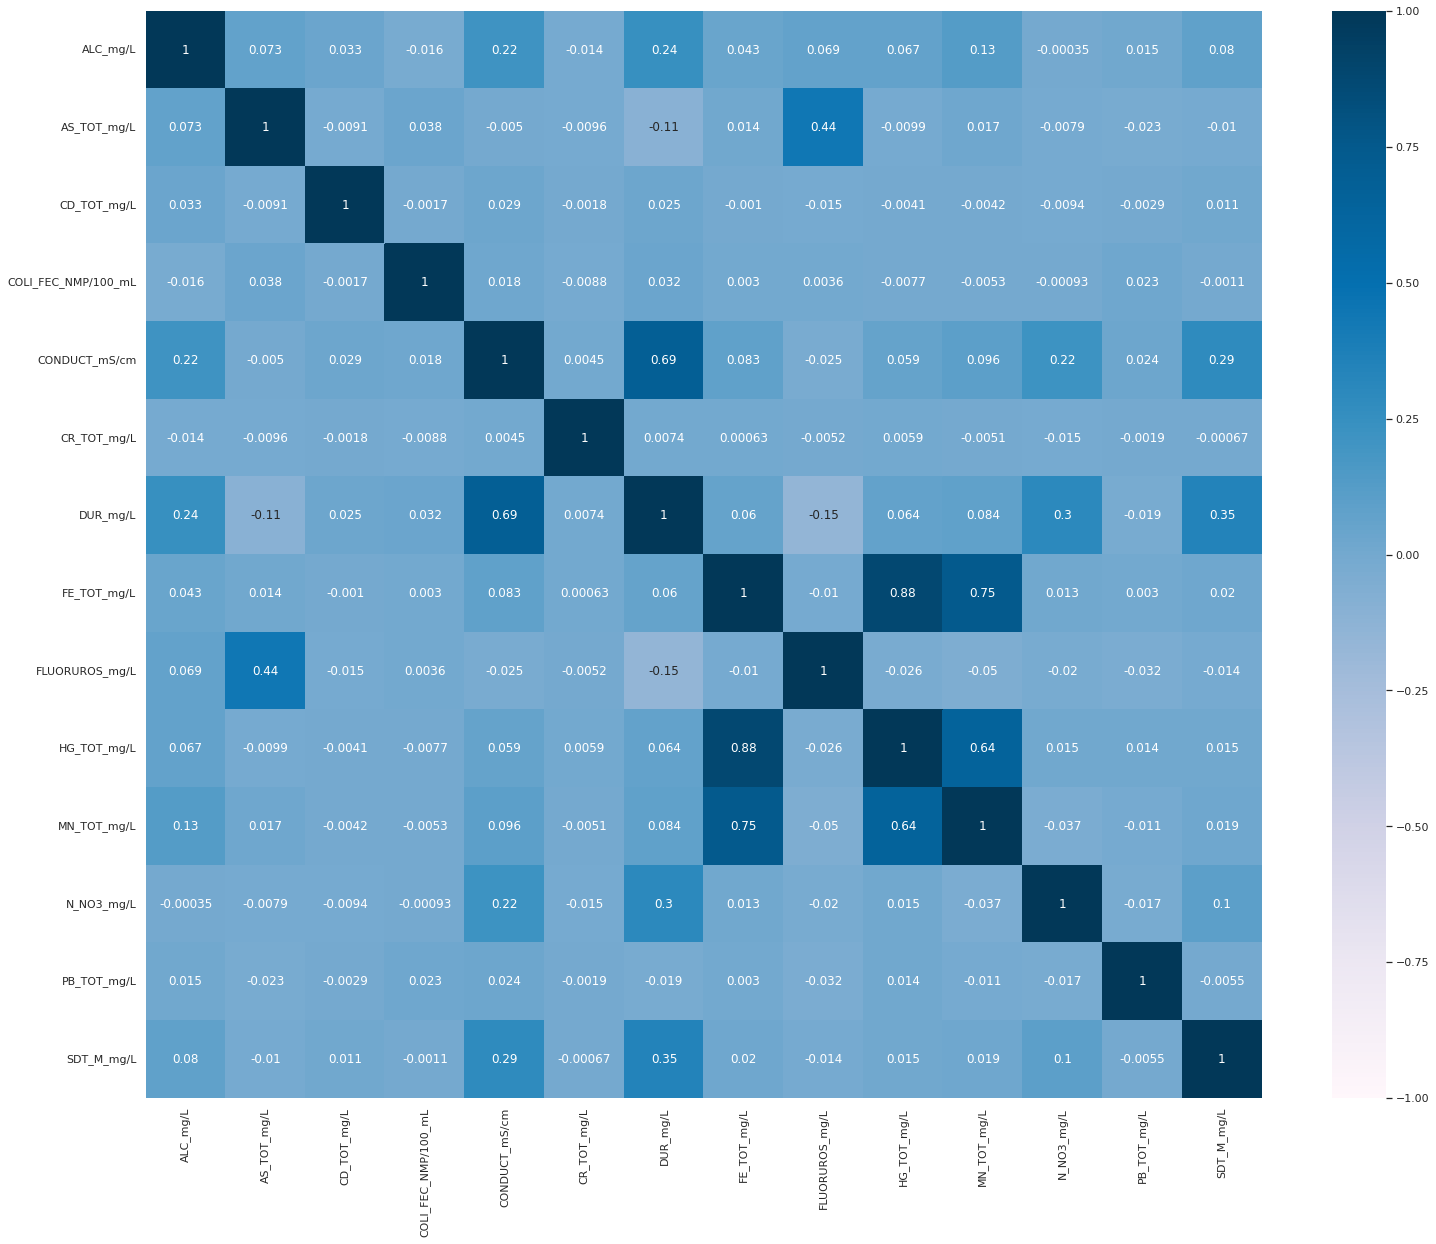

In [20]:
corrs = df_num.corr()
sns.set(rc = {'figure.figsize':(25,20)})
sns.heatmap(corrs, vmin = -1, vmax = 1, cmap = "PuBu", annot= True)

##PARTE 3 - Análisis con K Means 

Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.

In [21]:
df_ubicacion = df_as[['LONGITUD','LATITUD']]
df_ubicacion#creamos un nuevo dataframe con las variables que nos sirven para localizar 
#el lugar donde se tomó cada muestra de agua subterránea

,LONGITUD,LATITUD
0,-102.02210,22.20887
1,-102.20075,21.99958
2,-102.28801,22.36685
3,-102.29449,22.18435
4,-110.24480,23.45138
...,...,...
1063,-99.54191,24.76036
1064,-99.70099,24.78280
1065,-99.82249,25.55197
1066,-100.32683,24.80118


In [22]:
df_ubicacion["COORDENADAS"] = list(zip(df_ubicacion.LONGITUD, df_ubicacion.LATITUD))
df_ubicacion["COORDENADAS"] = df_ubicacion["COORDENADAS"].apply(Point)
df_ubicacion.head()#le agregamos una nueva columna a este dataframe para esa columna poder graficarla en un mapa

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,LONGITUD,LATITUD,COORDENADAS
0,-102.02210,22.20887,POINT (-102.0221 22.20887)
1,-102.20075,21.99958,POINT (-102.20075 21.99958)
2,-102.28801,22.36685,POINT (-102.28801 22.36685)
3,-102.29449,22.18435,POINT (-102.29449 22.18435)
4,-110.24480,23.45138,POINT (-110.2448 23.45138)


,LONGITUD,LATITUD,COORDENADAS
0,-102.02210,22.20887,POINT (-102.02210 22.20887)
1,-102.20075,21.99958,POINT (-102.20075 21.99958)
2,-102.28801,22.36685,POINT (-102.28801 22.36685)
3,-102.29449,22.18435,POINT (-102.29449 22.18435)
4,-110.24480,23.45138,POINT (-110.24480 23.45138)
...,...,...,...
1063,-99.54191,24.76036,POINT (-99.54191 24.76036)
1064,-99.70099,24.78280,POINT (-99.70099 24.78280)
1065,-99.82249,25.55197,POINT (-99.82249 25.55197)
1066,-100.32683,24.80118,POINT (-100.32683 24.80118)


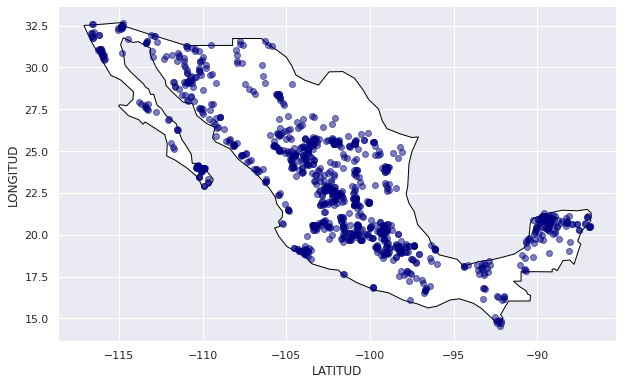

In [23]:
gdf = gpd.GeoDataFrame(df_ubicacion, geometry="COORDENADAS")
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

world = world.set_index("iso_a3")
world.name.unique()
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('LATITUD')
gax.set_ylabel('LONGITUD')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

gdf.plot(ax=gax, color='navy', alpha = 0.5)
gdf

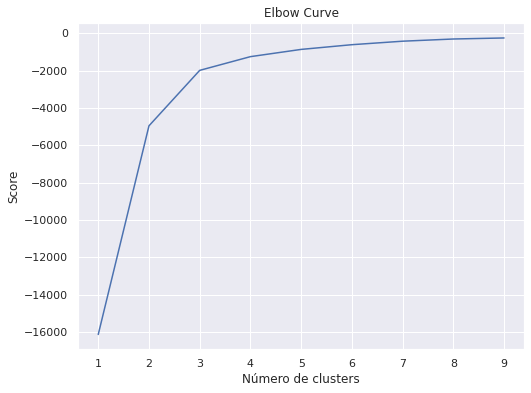

In [24]:
k_clusters = range(1,10) #arbitrariamente decidimos que el número de clusters no serán mas de diez 
k_means = [KMeans(n_clusters=i) for i in k_clusters] #evaluamos que numero de clusters es conveniente según la ubicación de las muestras
Y = df_ubicacion[['LATITUD']]
X = df_ubicacion[['LONGITUD']]
score = [k_means[i].fit(Y).score(Y) for i in range(len(k_means))] 

plt.figure(figsize=(8,6))
plt.plot(k_clusters, score)
plt.xlabel('Número de clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [73]:
X = df[['LONGITUD', 'LATITUD']]
k_means = KMeans(n_clusters = 20).fit(X) #creamos los  clusters 
centroides = k_means.cluster_centers_
labels = k_means.predict(X)

coord = pd.DataFrame(centroides)

coord["Coordenadas"] = list(zip(coord[0], coord[1]))#transformar a lista
coord["Coordenadas"] = coord["Coordenadas"].apply(Point) #unimos la longitud y latitud en uno solo, como lo hicimos al inicio

geopanda_df= gpd.GeoDataFrame(coord, geometry="Coordenadas") #convertimos el dataframe en un geodataframe para poder graficarlo en un mapa
geopanda_df

,0,1,Coordenadas
0,-89.627607,20.535159,POINT (-89.62761 20.53516)
1,-106.044505,24.800467,POINT (-106.04451 24.80047)
2,-98.904880,19.489493,POINT (-98.90488 19.48949)
3,-112.671813,27.005056,POINT (-112.67181 27.00506)
4,-101.649766,25.410791,POINT (-101.64977 25.41079)
5,-102.531149,22.656710,POINT (-102.53115 22.65671)
6,-110.788955,29.714956,POINT (-110.78896 29.71496)
7,-103.624279,19.996941,POINT (-103.62428 19.99694)
8,-93.018481,17.887457,POINT (-93.01848 17.88746)
9,-110.146688,23.819670,POINT (-110.14669 23.81967)


In [26]:
df['SEMAFORO'].value_counts()

Verde       434
Rojo        387
Amarillo    247
Name: SEMAFORO, dtype: int64

In [41]:
#df_ubicacion = df_ubicacion.join(df['SEMAFORO'])  > esta parte esta comentada debido a que el dataframe ya se había hecho al correr la celda por primera vez y se modificó permanentemente
df_ubicacion 

,LONGITUD,LATITUD,COORDENADAS,SEMAFORO
0,-102.02210,22.20887,POINT (-102.02210 22.20887),Verde
1,-102.20075,21.99958,POINT (-102.20075 21.99958),Verde
2,-102.28801,22.36685,POINT (-102.28801 22.36685),Rojo
3,-102.29449,22.18435,POINT (-102.29449 22.18435),Verde
4,-110.24480,23.45138,POINT (-110.24480 23.45138),Rojo
...,...,...,...,...
1063,-99.54191,24.76036,POINT (-99.54191 24.76036),Rojo
1064,-99.70099,24.78280,POINT (-99.70099 24.78280),Rojo
1065,-99.82249,25.55197,POINT (-99.82249 25.55197),Rojo
1066,-100.32683,24.80118,POINT (-100.32683 24.80118),Verde


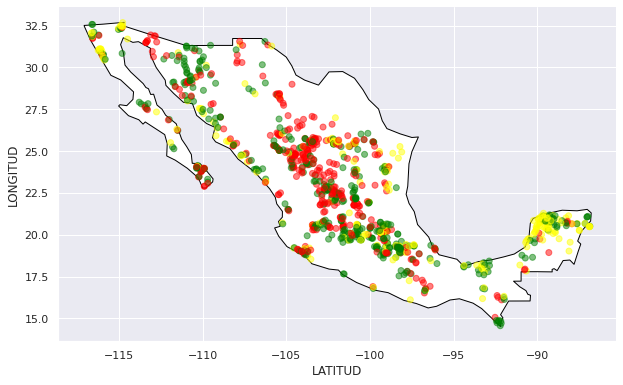

In [42]:
gdf_new = gpd.GeoDataFrame(df_ubicacion, geometry="COORDENADAS")
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

colores = {'Rojo':'red','Amarillo':'yellow','Verde':'green'}
world = world.set_index("iso_a3")
world.name.unique()
fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

gax.set_xlabel('LATITUD')
gax.set_ylabel('LONGITUD')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

gdf_new.plot(ax=gax, color=df_ubicacion['SEMAFORO'].map(colores), alpha = 0.5)

Al observar el mapa podemos ver que no existe un patrón sobre la calidad del agua subterránea en el país, por lo que podemos concluir que el hecho de que el agua subterránea este limpia o no, no tiene mucho que ver con la ubicación de donde se obtuvo la muestra. 

Lo único que podríamos decir es que más o menos en los estados de Durango y Zacatecas existe una gran cantidad de muestras con nivel de contaminación alto, mientras que gran parte de las muestras tomadas en poblaciones de Querétaro e Hidalgo tienen nivel bajo de contaminación, lo mismo en el norte de Sonora. 

##PARTE 4 - Agrupamiento y Visualización con K Means 

Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.


In [102]:
df_ubicacion['kmeans'] = k_means.labels_
df_ubicacion.loc[:, 'kmeans'].value_counts()

18    118
2     112
0      94
5      77
15     75
6      66
7      65
4      53
1      51
12     50
11     46
16     43
13     39
9      33
10     31
17     31
19     27
8      26
3      16
14     15
Name: kmeans, dtype: int64

En la celda anterior podemos obtener el número de muestras (k vecinos) que tiene cada kmeans, las cuales componen dicho cluster. 
La función k means busca ubicar cada uno de los centroides en el lugar donde tenga la menor distancia posible a cada una de las muestras, esto según el número de clusters que indiquemos. 

Entre más ordenados estén nuestras muestras en nuestro mapa (es decir, entre más juntas estén las muestras de cada color), menos cantidad de clusters necesitaremos. Sin embargo, como ya vimos en nuestro mapa, nuestros datos están muy desodernados y al menos a simple vista no parece haber un patrón muy claro de los datos respecto al lugar donde se tomó su muestra.

In [99]:
df_ubicacion

,LONGITUD,LATITUD,COORDENADAS,SEMAFORO,kmeans
0,-102.02210,22.20887,POINT (-102.02210 22.20887),Verde,5
1,-102.20075,21.99958,POINT (-102.20075 21.99958),Verde,5
2,-102.28801,22.36685,POINT (-102.28801 22.36685),Rojo,5
3,-102.29449,22.18435,POINT (-102.29449 22.18435),Verde,5
4,-110.24480,23.45138,POINT (-110.24480 23.45138),Rojo,9
...,...,...,...,...,...
1063,-99.54191,24.76036,POINT (-99.54191 24.76036),Rojo,13
1064,-99.70099,24.78280,POINT (-99.70099 24.78280),Rojo,13
1065,-99.82249,25.55197,POINT (-99.82249 25.55197),Rojo,13
1066,-100.32683,24.80118,POINT (-100.32683 24.80118),Verde,13


In [111]:
df_vecinos=df_ubicacion[['SEMAFORO','kmeans']]
df_vecinos#creamos un nuevo dataframe para obtener la frecuencia de los niveles en cada cluster

,SEMAFORO,kmeans
0,Verde,5
1,Verde,5
2,Rojo,5
3,Verde,5
4,Rojo,9
...,...,...
1063,Rojo,13
1064,Rojo,13
1065,Rojo,13
1066,Verde,13


In [123]:
freq = df_vecinos.groupby(['kmeans', 'SEMAFORO']).size() 
print(freq)

kmeans  SEMAFORO
0       Amarillo    58
        Rojo         4
        Verde       32
1       Amarillo     9
        Rojo        22
        Verde       20
2       Amarillo    29
        Rojo        20
        Verde       63
3       Amarillo     3
        Rojo         5
        Verde        8
4       Amarillo    20
        Rojo        20
        Verde       13
5       Amarillo     2
        Rojo        49
        Verde       26
6       Amarillo     4
        Rojo        17
        Verde       45
7       Amarillo     9
        Rojo        30
        Verde       26
8       Amarillo    11
        Rojo         2
        Verde       13
9       Amarillo     4
        Rojo        15
        Verde       14
10      Amarillo     5
        Rojo        19
        Verde        7
11      Amarillo     5
        Rojo        21
        Verde       20
12      Amarillo    22
        Rojo        15
        Verde       13
13      Amarillo    16
        Rojo        11
        Verde       12
14      Amarillo 

Gracias a la celda anterior podemos obtener cuantas muestras de cada nivel de contaminación existe para cada cluster. De esta manera podemos obtener cual nivel del semáforo es el más frecuente en el cluster y con esto poder descubrir un patrón para cada cluster. 

La función one hot encoding es otra forma de observar estos datos 

In [114]:
#crear la instancia
encoder = OneHotEncoder(handle_unknown='ignore')
#aplicar el one hot encoding
encoder_df = pd.DataFrame(encoder.fit_transform(df_vecinos[['SEMAFORO']]).toarray())
#unir las columnas del encoder con el df_vecinos 
final_df = df_vecinos.join(encoder_df)
final_df.columns = ['SEMAFORO', 'kmeans', 'Yellow', 'Red','Green']
final_df

,SEMAFORO,kmeans,Yellow,Red,Green
0,Verde,5,0.0,0.0,1.0
1,Verde,5,0.0,0.0,1.0
2,Rojo,5,0.0,1.0,0.0
3,Verde,5,0.0,0.0,1.0
4,Rojo,9,0.0,1.0,0.0
...,...,...,...,...,...
1063,Rojo,13,0.0,1.0,0.0
1064,Rojo,13,0.0,1.0,0.0
1065,Rojo,13,0.0,1.0,0.0
1066,Verde,13,0.0,0.0,1.0


De acuerdo a los resultados que obtuvimos de la frecuencia de los niveles de contaminación en cada cluster, podemos obtener el nivel del semáforo que más predomine en cada cluster y con ello crear los agrupamientos. 

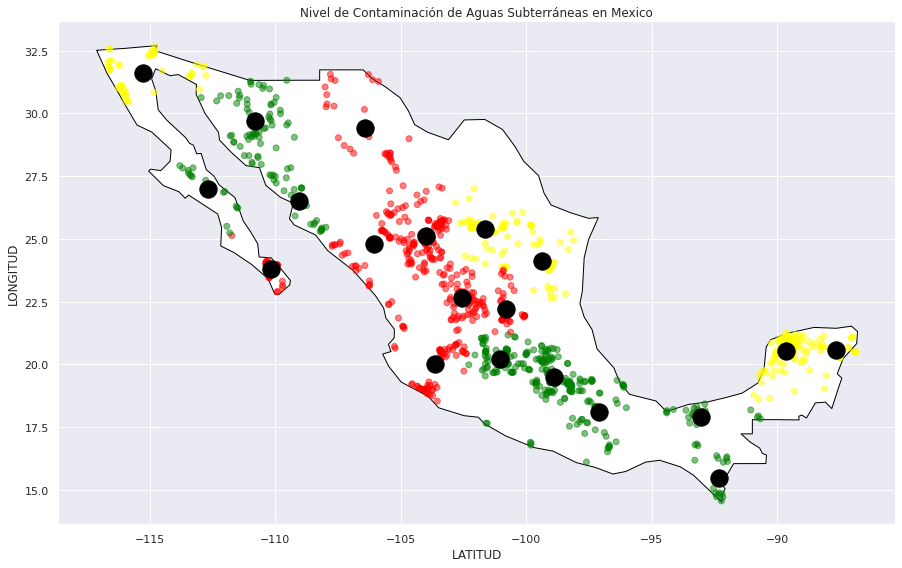

In [127]:
fig, gax = plt.subplots(figsize=(15,10))
colores=['yellow','red', 'green', 'green', 'yellow', 'red', 'green', 'red', 'green', 'red', 'red', 'red', 'yellow', 'yellow', 'green','green','green', 'green', 'red', 'yellow']
color_ = [] #esta lista de colores corresponden al nivel del semáforo que predomina en cada cluster 

for row in labels:
  color_.append(colores[row])

world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

gdf_new.plot(ax=gax, color=color_, alpha = 0.5)
geopanda_df.plot(ax=gax, color='black',alpha = 1, markersize = 300) 

gax.set_xlabel('LATITUD')
gax.set_ylabel('LONGITUD')
gax.set_title('Nivel de Contaminación de Aguas Subterráneas en Mexico')
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

Gracias a las funciones de K Means podemos descubrir patrones dentro del conjunto de datos que quizá a simple vista no se ven y de esta forma poder ver que nivel de contaminación predomina más en una vecindad/región. 
El objetivo del agrupamiento es tener una información más general y resumida sobre la contaminación de una región respecto a los niveles de contaminación de cada uno de los elementos/vecinos que compongan dicha región. 
En el mapa anterior podemos observar que en el sur del país el agua subterránea mayormente tiene un nivel de contaminación baja, mientras que en la región centro del país hay un nivel alto. También es fácil visualizar que en la península de Yucatán predomina el agua subterránea con un nivel medio de contaminación.

REFERENCIAS: 

1. plot different color for different categorical levels using matplotlib. (s. f.). NewbeDEV. https://newbedev.com/plot-different-color-for-different-categorical-levels-using-matplotlib

2. Waheed, A. (2020, 25 junio). Cómo contar la frecuencia con la que un valor se produce en Pandas DataFrame. Delft Stack. https://www.delftstack.com/es/howto/python-pandas/how-to-count-the-frequency-a-value-occurs-in-pandas-dataframe/